In [1]:
## All purpose
import pandas as pd 
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from gensim.summarization import keywords # pip3 install gensim==3.6.0
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

     |████████████████████████████████| 125 kB 11.4 MB/s 


In [2]:
## Creating sentimental polarity 
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Importing CSV file
df = pd.read_csv("/content/drive/MyDrive/redata/booking/eng/concated/UnitedKingdom.csv")
df['Total_Rating']=round(df['Total_Rating']/2,0)
## Applying Compund score
polarity_scores_p = df["Good_Review"].astype("str").apply(compound_score)
polarity_scores_n = df["Bad_Review"].astype("str").apply(compound_score)
df["Sentiment_Score_p"] = polarity_scores_p
df["Sentiment_Score_n"] = polarity_scores_n
## Applying Sentiment
df["Sentiment_p"] = df["Sentiment_Score_p"].apply(sentiment)
df["Sentiment_n"] = df["Sentiment_Score_n"].apply(sentiment)

In [ ]:
## Saving preprocessed file 
df.to_csv("/content/drive/MyDrive/redata/booking/Tripadvisor_Hotel-rating-sentiments_2.csv",index=False)

df.Sentiment_n.value_counts()

Neutral     636179
Negative     59210
Positive     47187
Name: Sentiment_n, dtype: int64

In [ ]:
df.Sentiment_p.value_counts()

Neutral     427166
Positive    311552
Negative      3858
Name: Sentiment_p, dtype: int64

In [ ]:
# Importing the Datafiniti_Hotel_Reviews Dataset
data=pd.read_csv('Tripadvisor_Hotel-rating-sentiments_2.csv')

# Having a look at the data
data.head()

,Reviewer_Id,Reviewer_Region,Review_Numbers,Total_Rating,Review_Title,Stay_Date,Tags,Bad_Review,Good_Review,Hotel_Name,Hotel_City,Hotel_Country,Sentiment_Score_p,Sentiment_Score_n,Sentiment_p,Sentiment_n
0,Katie,United Kingdom,1,3.0,“cold but convenient”,252022,"Leisure trip, Couple, Double Room, Stayed 1 n...",room was absolutely freezing couldn’t get warm...,quiet,CampanileHotelCardiff,cardiff,UnitedKingdom,0.0000,0.0534,Neutral,Neutral
1,Karen,United Kingdom,1,3.0,“cheep but basic. value for money”,242022,"Business trip, Solo traveller, Double Room, S...",felt more like a motel than hotel.,"bed was good, room was basic, but clean.",CampanileHotelCardiff,cardiff,UnitedKingdom,0.6705,0.4201,Positive,Neutral
2,Wendy,United Kingdom,22,4.0,“I will be back. Staff were lovely 😊”,152022,"Business trip, Solo traveller, Twin Room, Sta...",I was cold overnight but didn’t notice the ext...,staff were friendly and helpful.,CampanileHotelCardiff,cardiff,UnitedKingdom,0.7184,0.4497,Positive,Neutral
3,Peter,United Kingdom,1,3.0,“Great functional hotel”,142022,"Leisure trip, Couple, Double Room, Stayed 1 n...",Please fix the heater in room 105. Pre-heating...,"The room itself was very good. Very plush, ver...",CampanileHotelCardiff,cardiff,UnitedKingdom,0.7391,0.8742,Positive,Positive
4,Carty,United Kingdom,2,3.0,Pleasant,192021,"Leisure trip, People with friends, Twin Room,...",It is very tired and so basic for the cost,"Lovely staff, very helpful",CampanileHotelCardiff,cardiff,UnitedKingdom,0.7841,-0.4927,Positive,Neutral


In [ ]:
data.isna().sum()

Reviewer_Id               0
Reviewer_Region         107
Review_Numbers            0
Total_Rating              0
Review_Title            939
Stay_Date                 0
Tags                      0
Bad_Review           361107
Good_Review          286160
Hotel_Name                0
Hotel_City                0
Hotel_Country             0
Sentiment_Score_p         0
Sentiment_Score_n         0
Sentiment_p               0
Sentiment_n               0
dtype: int64

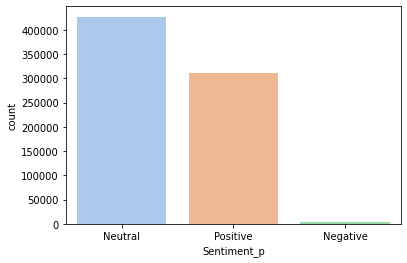

In [ ]:
sns.countplot(data=data,x="Sentiment_p",palette="pastel");

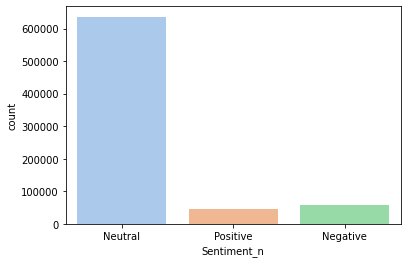

In [ ]:
sns.countplot(data=data,x="Sentiment_n",palette="pastel");

In [ ]:
# Preparing data for visualization 
Viz_1 = data[['Total_Rating','Sentiment_p']].value_counts().rename_axis(['Total_Rating','Sentiment_p']).reset_index(name='counts')

# Plotting the Bar Graph 
fig = px.bar(x=Viz_1['Total_Rating'], y=Viz_1.counts, color=Viz_1.Sentiment_p,color_discrete_sequence=px.colors.qualitative.Pastel,title="Positive Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

In [ ]:
# Preparing data for visualization 
Viz_1_n = data[['Total_Rating','Sentiment_n']].value_counts().rename_axis(['Total_Rating','Sentiment_n']).reset_index(name='counts')

# Plotting the Bar Graph 
fig_n1 = px.bar(x=Viz_1_n['Total_Rating'], y=Viz_1_n.counts, color=Viz_1_n.Sentiment_n,color_discrete_sequence=px.colors.qualitative.Pastel,title="Negative Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig_n1.show()

In [ ]:
#Viz2 Data preparation 
Viz_2 = data['Total_Rating'].value_counts().rename_axis(['Total_Rating']).reset_index(name='counts')
    
# Plotting  pie chart for ratings
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2['Total_Rating'], title='Rating Distribution of the data',color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()

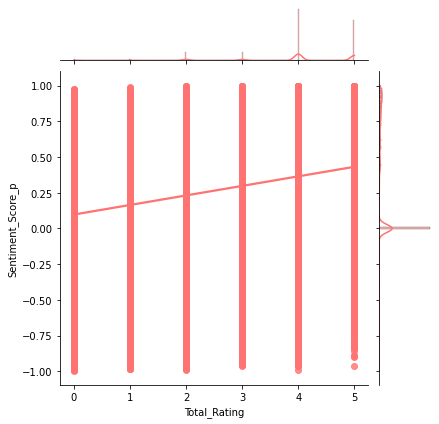

In [ ]:
# Jointplot on the basis of Rating and Sentiment Score of the data
jp = sns.jointplot(data=data,x='Total_Rating',y='Sentiment_Score_p',kind="reg",color='#ff7373')
# jp.fig.suptitle('Jointplot on the basis of Rating and Sentiment Score of the data',fontsize=20);

In [ ]:
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x=data['Total_Rating'][data['Total_Rating'] == rating],
                            y=data['Sentiment_Score_p'][data['Total_Rating'] == rating],
                            name=rating,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title="Violin plot of Rating and Sentiment Score with box plot",
    xaxis_title="Rating",
    yaxis_title="Sentiment Score",
    font=dict(
        family="Courier New, monospace",
        size=12,
        
    )
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x=data['Total_Rating'][data['Total_Rating'] == rating],
                            y=data['Sentiment_Score_n'][data['Total_Rating'] == rating],
                            name=rating,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title="Violin plot of Rating and Sentiment Score with box plot",
    xaxis_title="Rating",
    yaxis_title="Negative Sentiment Score",
    font=dict(
        family="Courier New, monospace",
        size=12,
        
    )
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data.tail()

,Reviewer_Id,Reviewer_Region,Review_Numbers,Total_Rating,Review_Title,Stay_Date,Tags,Bad_Review,Good_Review,Hotel_Name,Hotel_City,Hotel_Country,Sentiment_Score_p,Sentiment_Score_n,Sentiment_p,Sentiment_n
742571,Mandi,United Kingdom,3,5.0,“Fabulous!”,242021,"Leisure trip, People with friends, Lodge, Sta...",Second bedroom slightly on the small side for ...,Clean and modern property with everything we n...,YorkshireLodgewithHotTub,york,UnitedKingdom,0.7959,0.0,Positive,Neutral
742572,Wayne,United Kingdom,1,4.0,“A great stay and base for relaxing break.”,182021,"Leisure trip, Couple, Lodge, Stayed 4 nights,...",NaN,"Lodge was in quiet location, well equipped and...",YorkshireLodgewithHotTub,york,UnitedKingdom,0.8225,0.0,Positive,Neutral
742573,Lauren,United Kingdom,1,5.0,Exceptional,132021,"Leisure trip, People with friends, Lodge, Sta...",NaN,"Set on gorgeous land, great approachable staff...",YorkshireLodgewithHotTub,york,UnitedKingdom,0.8553,0.0,Positive,Neutral
742574,Denise,Spain,14,5.0,“Perfect stay hot tub amazing”,132021,"Business trip, Solo traveller, Lodge, Stayed ...",Nothing,"Our stay was amazing , accommodation perfect t...",YorkshireLodgewithHotTub,york,UnitedKingdom,0.9443,0.0,Positive,Neutral
742575,Anne-marie,United Kingdom,1,4.0,“Yorkshire Lodge hot tub break!”,142021,"Leisure trip, Family with young children, Lod...",NaN,"Lovely clean caravan, gorgeously hot hot tub!S...",YorkshireLodgewithHotTub,york,UnitedKingdom,0.9611,0.0,Positive,Neutral


In [ ]:
def processString(txt): # https://www.delftstack.com/zh-tw/howto/python/python-replace-multiple-characters/
    specialChars = "!#$%^&*()/|," 
    for specialChar in specialChars:
        txt = txt.replace(specialChar, '')
        txt = txt.replace(' ', '')
        txt = txt.replace('\t', '')
        txt = txt.replace('\n', '')
        #print(txt)
    return(txt)

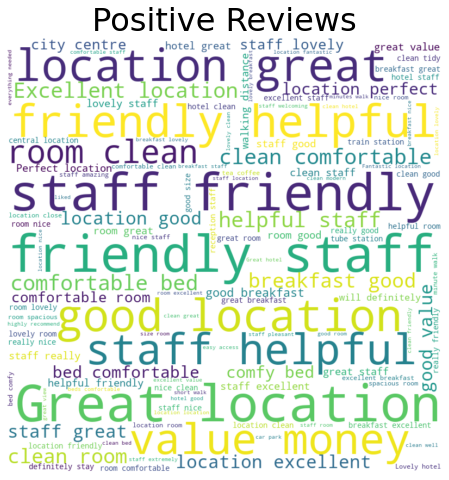

In [ ]:
text1 =''
Sentiment_p='Positive' # In original article, he used deepnote tool to change datatype.
for i in data[data['Sentiment_p']==str(Sentiment_p)]['Good_Review'].values: 
    text1+=i + ' '
    
wc = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True,)
wc.generate(text1)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(Sentiment_p+' Reviews',fontsize=32);

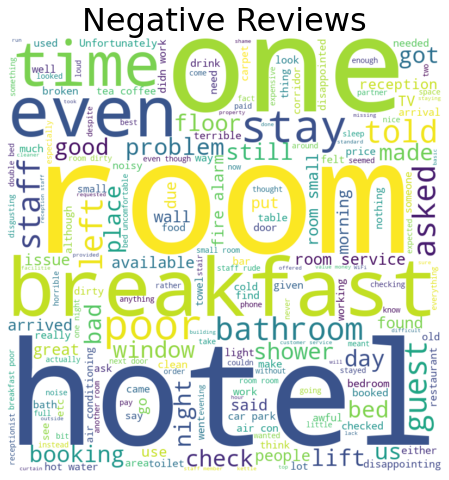

In [ ]:
text1 =''
Sentiment_n='Negative' # In original article, he used deepnote tool to change datatype.
for i in data[data['Sentiment_n']==str(Sentiment_n)]['Bad_Review'].values: 
    text1+=i + ' '
    
wc = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True,)
wc.generate(text1)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(Sentiment_p+' Reviews',fontsize=32);

In [ ]:
Neu=data[data['Sentiment_n']=='Neutral']['Bad_Review'].values 
Neu=Neu[Neu != np.array(None)]
Neu=Neu[Neu != 'nan']
Neu.astype(str)

NameError: ignored

IndexError: ignored

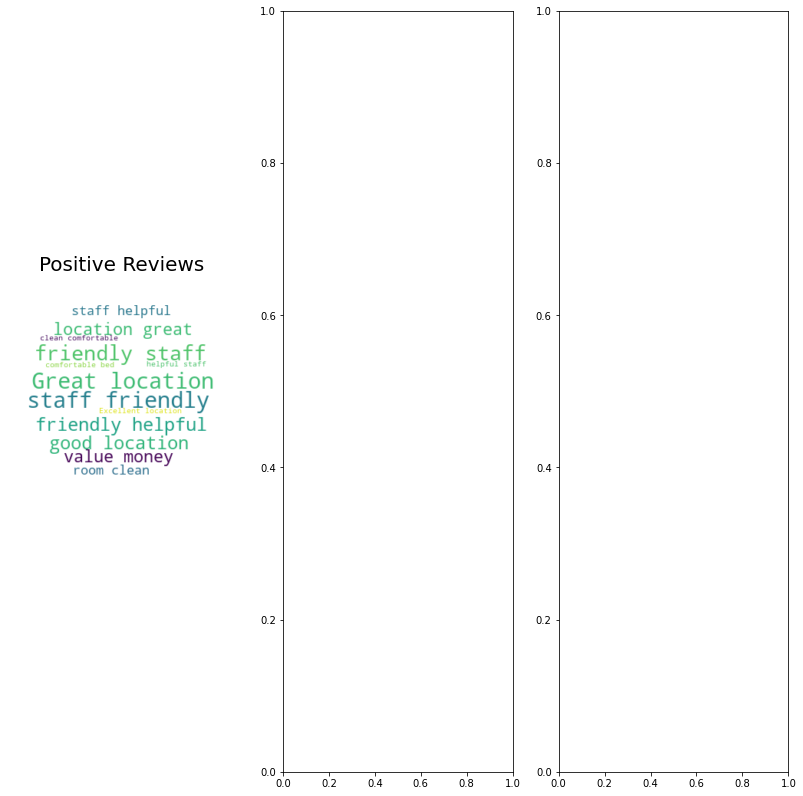

In [ ]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 14], facecolor = None)

text1 =''
for i in data[data['Sentiment_p']=='Positive']['Good_Review'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('Positive Reviews',fontsize=20);

text2 =''
for i in Neu[Neu['Sentiment_n']=='Neutral']['Bad_Review'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('Neutral Reviews',fontsize=20);

text3 =''
for i in data[data['Sentiment_n']=='Negative']['Bad_Review'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('Negetive Reviews',fontsize=20);

plt.show()

In [ ]:
input_1="We were together with some friends at the Anewandter Hof. We took all 4 apartments, which enabled us privacy & piece. Apartments are fully equiped. Free use of sauna & whirlpool in the hotel was a bonus. Every morning there is a fresh bread waiting for us at the door. Great atmosphere, hospitable family Mairl and affordable price."

In [ ]:
keywords(input_1).split("\n") # Need to modify.

['piece', 'bread', 'free', 'equiped']

In [ ]:
data["keywords"] = data["Good_Review"].apply(keywords)
data["keywords"] = data["keywords"].astype("str").str.replace('\n',',',) 

In [ ]:
words = []
for x in data.keywords.values:
    x=x.split(",")
    for i in x:
        words.append(i)

In [ ]:
from collections import Counter
word_counter = Counter(words)

In [ ]:
word_df = pd.DataFrame(np.array(list(word_counter.items())),columns=["keyword","count"])

In [ ]:
word_df["count"] = word_df["count"].astype(int)
word_df = word_df.sort_values(['count'], ascending=False)
top_20 = word_df[0:19]
word_df.head(10)

,keyword,count
43,hotel,1270
7,room,1082
29,great,952
8,rooms,647
38,stay,633
41,staff,556
39,good,504
225,breakfast,486
5,location,426
186,nice,405


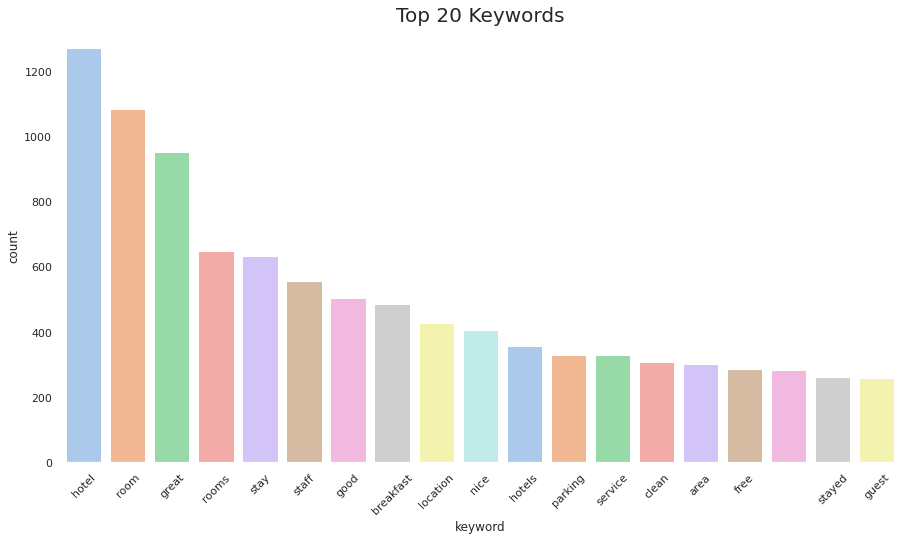

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
fig, ax = plt.subplots()

ax = sns.barplot(data=top_20,x="keyword",y="count",palette="pastel")
ax.patch.set_visible(False)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Top 20 Keywords",fontsize=20);

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
top5 = ["hotel","room","rooms","hotels"]
for x in top5:
    data["Good_Review"] = data["Good_Review"].astype(str).str.replace(x,"")

In [ ]:
data.head(2)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,Sentiment_Score,Sentiment,keywords,Review
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,-119.81979,Best Western Plus South Coast Inn,93117,CA,2018-01-01T00:00:00.000Z,NaN,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...,0.8271,Positive,train track,"This hotel was nice and quiet. Did not know, t..."
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-04-02T00:00:00Z,NaN,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,0.2892,Neutral,"bed,king",We stayed in the king suite with the separatio...


In [ ]:
data2=data.copy()
      
def removing_stop_words(txt):
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(txt) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
     
    return filtered_sentence
    
data2["Good_Review"] = data2["Good_Review"].apply(removing_stop_words)

In [ ]:
# Making a function to lemmatize 
lemmatizer = WordNetLemmatizer() 
def lemmatize(data):
    lema_data=[]
    for j in data:
        x=j.lower()
        x=lemmatizer.lemmatize(j,pos='n')
        x=lemmatizer.lemmatize(j,pos='v')
        x=lemmatizer.lemmatize(j,pos='a')
        x=lemmatizer.lemmatize(j,pos='r')
        x=lemmatizer.lemmatize(x)
        lema_data.append(x)
    return lema_data


data2["Good_Review"] = data2["Good_Review"].apply(lemmatize)

In [ ]:
data2["Good_Review"] = data2["Good_Review"].apply(lambda x:" ".join(token for token in x))

In [ ]:
data2.head(2)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,Sentiment_Score,Sentiment,keywords,Review
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,-119.81979,Best Western Plus South Coast Inn,93117,CA,2018-01-01T00:00:00.000Z,NaN,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel nice quiet . Did know , train track...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...,0.8271,Positive,train track,"This hotel was nice and quiet. Did not know, t..."
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-04-02T00:00:00Z,NaN,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed king suite separation bedroom living...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,0.2892,Neutral,"bed,king",We stayed in the king suite with the separatio...


In [ ]:
X = data2["Good_Review"].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

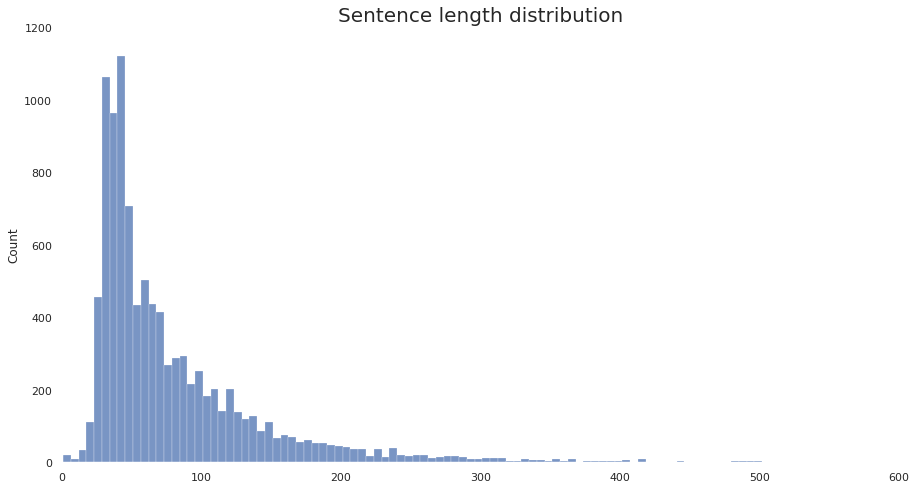

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
length_dist = [len(x.split(" ")) for x in X]
sns.histplot(length_dist,palette="pastel")
ax.patch.set_visible(False)
ax.set_xlim(0,600)
ax.set_ylim(0,1200)
ax.set_title("Sentence length distribution",fontsize=20);
plt.show()

In [ ]:
X = tokenizer.texts_to_sequences(X)

max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))

Vocabulary size: 20999
max length of sentence: 1507


In [ ]:
# Padding the reviews [Pads sequences to the same length.]
X = pad_sequences(X, padding='post', maxlen=600)

In [ ]:
labels = ['1', '2', '3', '4', '5']
          
y = data['reviews.rating']
y = y.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [ ]:
embedding_dim =16
EPOCHS = 5
BATCH_SIZE = 125
units = 76
val_split = 0.12

In [ ]:
model = tf.keras.Sequential([
    L.Embedding(vocab_size, int(embedding_dim), input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(int(units),return_sequences=True)),
    L.Conv1D(64,3),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.2),
    L.Dense(128, activation="relu"),
    L.Dropout(0.2),
    L.Dense(64, activation="relu"),
    L.Dropout(0.2),
    L.Dense(5, activation="softmax")
])

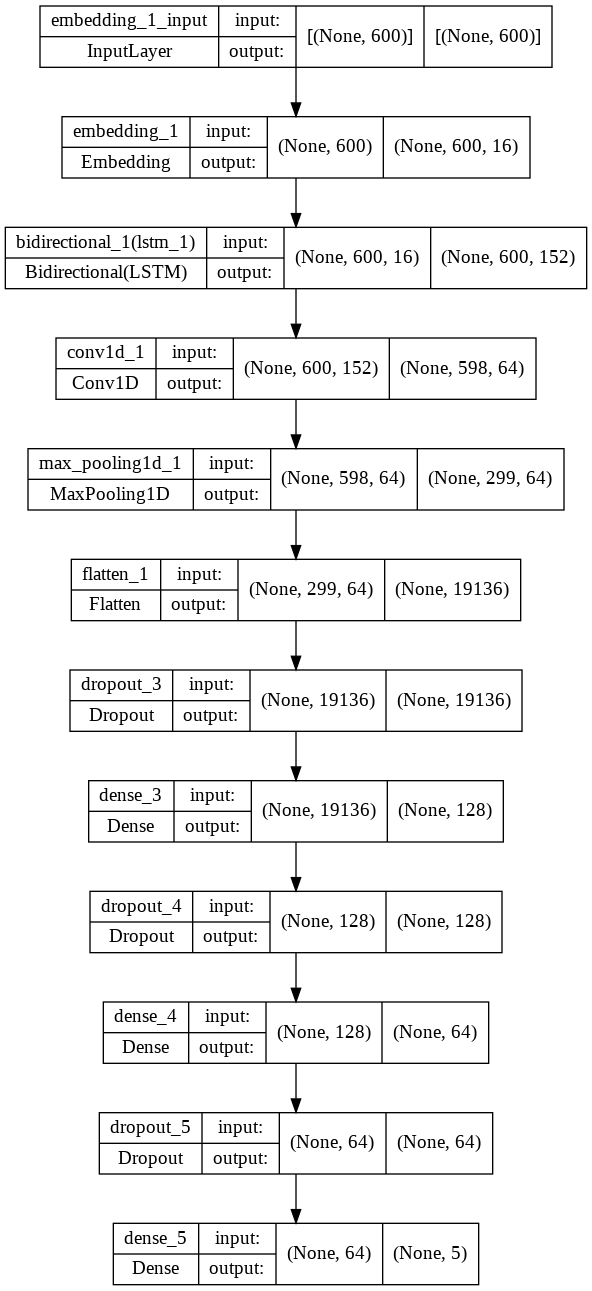

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) # You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',metrics=['accuracy']
             )

In [ ]:
history = model.fit(X_train, y_train, epochs=int(EPOCHS), validation_split=float(val_split), batch_size=int(BATCH_SIZE), verbose=2)

Epoch 1/5
64/64 - 20s - loss: 1.2802 - accuracy: 0.4635 - val_loss: 1.0493 - val_accuracy: 0.5176 - 20s/epoch - 309ms/step
Epoch 2/5
64/64 - 13s - loss: 0.9829 - accuracy: 0.5414 - val_loss: 0.9187 - val_accuracy: 0.5796 - 13s/epoch - 204ms/step
Epoch 3/5
64/64 - 13s - loss: 0.8139 - accuracy: 0.6354 - val_loss: 0.8890 - val_accuracy: 0.5852 - 13s/epoch - 206ms/step
Epoch 4/5
64/64 - 13s - loss: 0.6689 - accuracy: 0.7155 - val_loss: 0.9909 - val_accuracy: 0.6102 - 13s/epoch - 207ms/step
Epoch 5/5
64/64 - 13s - loss: 0.5392 - accuracy: 0.7817 - val_loss: 1.1094 - val_accuracy: 0.6167 - 13s/epoch - 206ms/step


In [ ]:
pred = model.predict(X_test)
pred_final = np.argmax(pred,axis=-1)
pred_final

array([3, 3, 2, 4, 2, 4, 3, 2, 4, 4, 3, 4, 2, 4, 3, 4, 4, 3, 4, 3, 4, 2,
       0, 3, 4, 3, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 3, 2, 4, 3, 4, 4, 4, 0,
       3, 2, 4, 4, 3, 0, 4, 3, 3, 4, 0, 3, 4, 2, 4, 1, 4, 4, 2, 0, 4, 4,
       4, 4, 4, 2, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 0, 2, 0, 3, 4, 4, 4,
       4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 3, 4, 4, 0, 4, 3, 3, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 0, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 0,
       4, 2, 4, 4, 4, 2, 0, 4, 4, 2, 3, 3, 3, 3, 4, 3, 2, 4, 4, 4, 4, 2,
       3, 2, 4, 0, 4, 2, 4, 4, 4, 4, 0, 3, 3, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 0, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 2, 4, 4,
       3, 0, 4, 4, 4, 4, 2, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 2, 4, 2, 3,
       4, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 3, 0, 4, 4, 4, 3, 0, 4, 4, 4, 4, 2, 3, 2, 4, 3, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 1, 4, 4, 2, 4, 4,
       2, 3, 0, 2, 0, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(pred_final, y_test)*100),2))

Accuracy: 62%


In [ ]:
from sklearn.metrics import mean_squared_error
print("Root mean square error: {}".format(round(np.sqrt(mean_squared_error(pred_final,y_test)),3)))

Root mean square error: 0.88


In [ ]:
model.save("Ds_BiLSTM_2.h5")

In [ ]:
new_model = tf.keras.models.load_model('Ds_BiLSTM_2.h5')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 16)           335984    
                                                                 
 bidirectional_1 (Bidirectio  (None, 600, 152)         56544     
 nal)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 598, 64)           29248     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 299, 64)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 19136)             0         
                                                                 
 dropout_3 (Dropout)         (None, 19136)            